# Telco Customer Churn Prediction and Analysis

## Table of Contents
1. Introduction
2. Data Loading & Overview
3. Data Cleaning & Preprocessing
4. Exploratory Data Analysis (EDA)
5. Statistical Tests for Feature Relevance
6. Feature Engineering
7. Feature Selection
8. LightGBM Model
9. Save the model


## 1. Introduction

This notebook implements an end-to-end pipeline for Telco customer churn prediction:
- data loading and cleaning
- exploratory data analysis
- statistical testing
- feature engineering 
- feature selection 
- model training and evaluation for LightGBM
- Save model 


The goal is to identify customers at risk of churn.

## 2. Data Loading & Overview

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("D:/ayat/DATA SCIENCE/final project/Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 21)

In [4]:
data.dtypes.value_counts()

object     18
int64       2
float64     1
Name: count, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data.duplicated().sum()

np.int64(0)

## 3. Data Cleaning & Preprocessing

We will perform the main cleaning steps:
- convert TotalCharges to numeric and handle missing values
- basic inspections (duplicates, missing values)
- keep a cleaned copy saved to `../dataset/cleaned_Telco-Customer-Churn.csv` for reproducibility

In [8]:
import plotly.express as px

In [9]:
cleaned_data = data.copy()

In [10]:
# convert TotalCharges to numeric
cleaned_data['TotalCharges'] = pd.to_numeric(cleaned_data['TotalCharges'], errors='coerce')

In [11]:
cleaned_data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
cleaned_data.duplicated().sum()

np.int64(0)

In [13]:
# drop rows where TotalCharges is missing
cleaned_data = cleaned_data.dropna()

In [14]:
cleaned_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 4. Exploratory Data Analysis (EDA)

We will make the basic descriptive statistics for numeric columns ,inspect categorical distributions and plot numeric boxplots and histograms.
The visualizations help detect patterns and potential issues to consider in modeling.

In [15]:
# 1- numeric columns
numeric_cols = ['tenure','MonthlyCharges','TotalCharges']
cleaned_data[numeric_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [16]:
# distribution by churn for numeric columns
for col in numeric_cols:
    fig = px.histogram(cleaned_data,x= col,color='Churn',title=f'{col} Distribution by Churn')
    fig.show()

In [17]:
# outliers
for col in numeric_cols:
    fig = px.box(cleaned_data,y=col,points='all',title=f'{col} Boxplot')
    fig.show()

In [18]:
# categorical columns
cat_cols = cleaned_data.select_dtypes(include='object').columns.to_list()
cat_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [19]:
# value distribution
for col in cat_cols:
    print(cleaned_data[col].value_counts(normalize=True).head())

customerID
3186-AJIEK    0.000142
7590-VHVEG    0.000142
5575-GNVDE    0.000142
3668-QPYBK    0.000142
7795-CFOCW    0.000142
Name: proportion, dtype: float64
gender
Male      0.504693
Female    0.495307
Name: proportion, dtype: float64
Partner
No     0.517491
Yes    0.482509
Name: proportion, dtype: float64
Dependents
No     0.701507
Yes    0.298493
Name: proportion, dtype: float64
PhoneService
Yes    0.903299
No     0.096701
Name: proportion, dtype: float64
MultipleLines
No                  0.481371
Yes                 0.421928
No phone service    0.096701
Name: proportion, dtype: float64
InternetService
Fiber optic    0.440273
DSL            0.343572
No             0.216155
Name: proportion, dtype: float64
OnlineSecurity
No                     0.497298
Yes                    0.286547
No internet service    0.216155
Name: proportion, dtype: float64
OnlineBackup
No                     0.438993
Yes                    0.344852
No internet service    0.216155
Name: proportion, dtype: flo

In [20]:
# distribution by churn for categorical columns
for col in cat_cols:
    if col != 'customerID':
        fig= px.histogram(cleaned_data,x=col,color='Churn',title=f'{col} Distribution by Churn')
        fig.show()

In [21]:
# Correlation Matrix
cleaned_data['Churn_encoded'] = cleaned_data['Churn'].map({'No': 0, 'Yes': 1})

corr = cleaned_data[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_encoded']].corr()

fig = px.imshow(corr, text_auto=True, color_continuous_scale='Blues', title='Correlation Heatmap')
fig.show()

## Key EDA Insights

- Tenure is strongly associated with churn: customers with **shorter tenure** are much more likely to churn than long-tenure customers. This suggests tenure is a primary retention indicator.
- MonthlyCharges shows a positive relationship with churn: **higher monthly charges** tend to appear more frequently among churners.
- Contract type is highly informative: **month-to-month contracts** show much higher churn rates than 1-year or 2-year contracts.
- Paperless billing and certain payment methods (e.g., non-automatic payment) have higher churn proportions compared to customers with contract commitments or automatic payments.
- Some service indicators (e.g., lack of OnlineSecurity or TechSupport, presence of Fiber Internet) are more common in churned customers. These are candidate behavioral/service risk factors.
- There are no extreme, data-breaking outliers in the numeric features that justify automatic removal — many high values represent real customer behavior (e.g., short-tenure with high charges).

In [22]:
cleaned_data.to_csv("D:/ayat/DATA SCIENCE/final project/cleaned_Telco-Customer-Churn.csv", index=False)

## 5.Statistical Tests for Feature Relevance:
We now perform statistical tests to understand which features are signifciantly associated with customer churn.

We’ll use:
Chi-Square Test for categorical features  
Mann–Whitney U Test (non-parametric) for numerical features  


In [23]:
#pip install scipy

In [24]:
from scipy.stats import chi2_contingency, mannwhitneyu
import pandas as pd
cleaned_data = pd.read_csv("D:/ayat/DATA SCIENCE/final project/cleaned_Telco-Customer-Churn.csv")
# --- Chi-Square Test  ---
cat_cols = cleaned_data.select_dtypes(include='object').columns.drop('customerID')

chi2_results = []
for col in cat_cols:
    contingency = pd.crosstab(cleaned_data[col], cleaned_data['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    chi2_results.append({'Feature': col, 'Chi2': chi2, 'p-value': p})

chi2_df = pd.DataFrame(chi2_results).sort_values('p-value')
display(chi2_df)

print('Categorical features with p < 0.05 are significantly related to churn.')


,Feature,Chi2,p-value
15,Churn,7026.876495,0.000000e+00
12,Contract,1179.545829,7.326182e-257
6,OnlineSecurity,846.677389,1.400687e-184
9,TechSupport,824.925564,7.407808e-180
5,InternetService,728.695614,5.831199e-159
14,PaymentMethod,645.429900,1.426310e-139
7,OnlineBackup,599.175185,7.776099e-131
8,DeviceProtection,555.880327,1.959389e-121
11,StreamingMovies,374.268432,5.353560e-82
10,StreamingTV,372.456502,1.324641e-81


Categorical features with p < 0.05 are significantly related to churn.


In [25]:
# --- Mann–Whitney U Test for Numerical Variables ---
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_cols:
    churn_yes = cleaned_data[cleaned_data['Churn'] == 'Yes'][col]
    churn_no = cleaned_data[cleaned_data['Churn'] == 'No'][col]
    stat, p = mannwhitneyu(churn_yes, churn_no)
    print(f'{col}: p-value = {p:.4f}')

print('numeric features with p < 0.05 differ significantly between churn groups.')


tenure: p-value = 0.0000
MonthlyCharges: p-value = 0.0000
TotalCharges: p-value = 0.0000
numeric features with p < 0.05 differ significantly between churn groups.


### Insights:
Categorical features such as Contract, PaymentMethod, and InternetService often show strong significance.  
Numerical features tenure and MonthlyCharges typically have significant differences between churned and retained customers.


## 6.Feature Engineering:
Now we create new features that capture customer behavior and service usage patterns to improve model performance.

In [26]:
data = pd.read_csv("D:/ayat/DATA SCIENCE/final project/cleaned_Telco-Customer-Churn.csv")
cleaned_data = data.copy()

In [27]:
print(cleaned_data.columns.tolist())

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Churn_encoded']


In [28]:
# 1.Binary encoding
replace_map = {
    'No internet service': 'No',
    'No phone service': 'No'
}

cols_with_no_service = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in cols_with_no_service:
    cleaned_data[col] = cleaned_data[col].replace(replace_map)

binary_cols = [col for col in cleaned_data.columns if set(cleaned_data[col].dropna().unique()) <= {'Yes', 'No'}]

for col in binary_cols:
    cleaned_data[col] = cleaned_data[col].map({'Yes': 1, 'No': 0})

print('Binary encoding completed successfully!')


Binary encoding completed successfully!


In [29]:
# 2.Tenure Groups
cleaned_data['tenure_group'] = pd.cut(
    cleaned_data['tenure'],
    bins=[0, 12, 24, 48, 72],
    labels=['0:12m', '13:24m', '25:48m', '49:72m']
)

# 3.Average Monthly Spending per Tenure ---
cleaned_data['AvgChargesPerMonth'] = cleaned_data['TotalCharges'] / cleaned_data['tenure'].replace(0, 1)

# 4.Service Count
service_cols = ['PhoneService', 'MultipleLines' ,'OnlineSecurity', 
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                'StreamingTV', 'StreamingMovies']
cleaned_data['ServiceCount'] = cleaned_data[service_cols].apply(lambda x: (x == 'Yes').sum(), axis=1)

# 5.One-Hot Encode Multi-Category Columns
multi_cat_cols = ['Contract', 'PaymentMethod', 'InternetService']
cleaned_data = pd.get_dummies(cleaned_data, columns=multi_cat_cols, drop_first=True)

# 6.Interaction Feature: Tenure × MonthlyCharges
cleaned_data['Tenure_x_Charges'] = cleaned_data['tenure'] * cleaned_data['MonthlyCharges']
print('Feature engineering completed.')
cleaned_data.to_csv('feature_engineered_telco.csv', index=False)
print('Saved as feature_engineered_telco.csv')

Feature engineering completed.
Saved as feature_engineered_telco.csv


### Insights:
Tenure groups help the model capture retention patterns by time range.  
AvgChargesPerMonth measures spending consistency.  
ServiceCount captures customer engagement with multiple services.  
Binary encoding prepares categorical columns for modeling.  
Tenure Charges interaction identifies high-paying short-tenure customers (often churn-prone).  


## 7. Feature Selection

In [30]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv("D:/ayat/DATA SCIENCE/final project/feature_engineered_telco.csv")

# Display shape and first few rows
print(df.shape)
df.head()

(7032, 30)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,AvgChargesPerMonth,ServiceCount,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,Tenure_x_Charges
0,7590-VHVEG,Female,0,1,0,1,0,0,0,1,...,29.850000,0,False,False,False,True,False,False,False,29.85
1,5575-GNVDE,Male,0,0,0,34,1,0,1,0,...,55.573529,0,True,False,False,False,True,False,False,1936.30
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,54.075000,0,False,False,False,False,True,False,False,107.70
3,7795-CFOCW,Male,0,0,0,45,0,0,1,0,...,40.905556,0,True,False,False,False,False,False,False,1903.50
4,9237-HQITU,Female,0,0,0,2,1,0,0,0,...,75.825000,0,False,False,False,True,False,True,False,141.40


In [31]:
# Define X (features) and y (target)
X = df.drop(['customerID', 'Churn_encoded', 'Churn'], axis=1, errors='ignore')
y = df['Churn_encoded']

In [32]:
#Convert All Columns to Numeric
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)
X.dtypes
#X.head()

gender                                   float64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
tenure_group                             float64
AvgChargesPerMonth                       float64
ServiceCount                               int64
Contract_One year                           bool
Contract_Two year   

In [33]:
#Normalize the Features (Scaling)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
#Apply the Chi-Square Test
selector = SelectKBest(score_func=chi2, k=10)
selector.fit(X_scaled, y)

selected_features = X.columns[selector.get_support()]
print('Top 10 Features Selected using Chi-Square Test:')
print(selected_features)


Top 10 Features Selected using Chi-Square Test:
Index(['SeniorCitizen', 'Dependents', 'tenure', 'OnlineSecurity',
       'TechSupport', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'InternetService_No'],
      dtype='object')


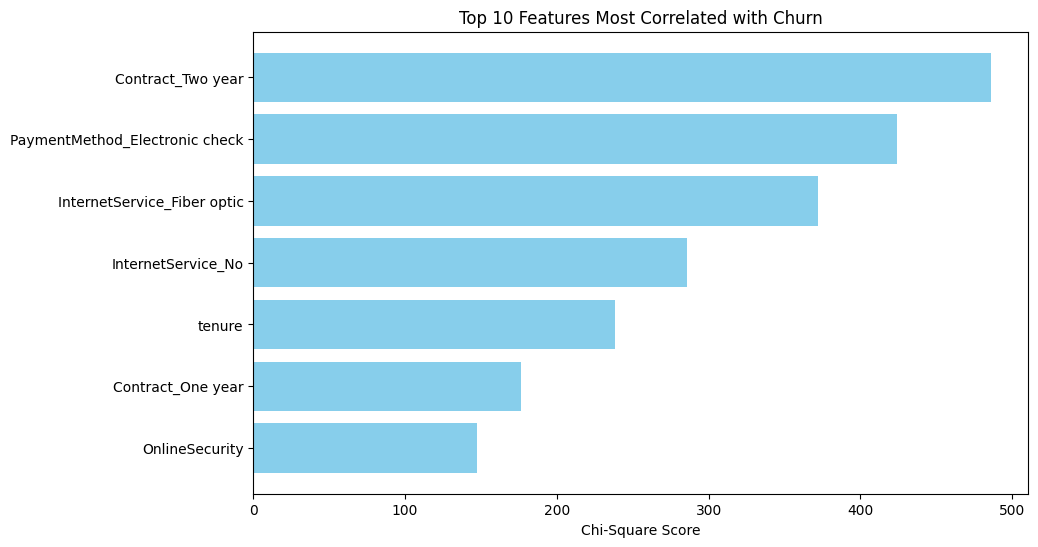

In [35]:
#Visualize Top 10 Features
import matplotlib.pyplot as plt
import numpy as np

# Get chi2 scores and feature names
chi2_scores = selector.scores_
feature_names = X.columns

# Sort features by importance (descending)
sorted_indices = np.argsort(chi2_scores)[::-1][:10]
top_features = feature_names[sorted_indices]
top_scores = chi2_scores[sorted_indices]

# Plot
plt.figure(figsize=(10,6))
plt.barh(top_features, top_scores, color='skyblue')
plt.xlabel('Chi-Square Score')
plt.title('Top 10 Features Most Correlated with Churn')
plt.gca().invert_yaxis()
plt.show()


### Insights:

Contract Type & Payment Method
Customers on yearly contracts or automatic payments are less likely to churn.

InternetService & Support
Fiber optic users or those without OnlineSecurity/TechSupport show higher churn rates.

Tenure (Customer Age)
Longer-tenure customers are more loyal.

Combined Feature (Tenure_x_Charges)
Shows how spending consistency over time affects churn.

SeniorCitizen
Older customers might have specific service preferences or needs impacting retention.

## 8. LightGBM Model

In [36]:
#import libraries
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns




In [37]:
#Load the dataset
df = pd.read_csv("D:/ayat/DATA SCIENCE/final project/feature_engineered_telco.csv")
print(df.head())


   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG  Female              0        1           0       1   
1  5575-GNVDE    Male              0        0           0      34   
2  3668-QPYBK    Male              0        0           0       2   
3  7795-CFOCW    Male              0        0           0      45   
4  9237-HQITU  Female              0        0           0       2   

   PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  ...  \
0             0              0               0             1  ...   
1             1              0               1             0  ...   
2             1              0               1             1  ...   
3             0              0               1             0  ...   
4             1              0               0             0  ...   

   AvgChargesPerMonth  ServiceCount  Contract_One year  Contract_Two year  \
0           29.850000             0              False              False   
1           55.5

In [38]:
#Define features (X) and target (y)
selected_features = [ 'SeniorCitizen', 'Dependents', 'tenure', 'OnlineSecurity',
                      'TechSupport', 'Contract_One year', 'Contract_Two year','PaymentMethod_Electronic check',
                        'InternetService_Fiber optic','InternetService_No'
]

# Define X and y
X = df[selected_features]
y = df['Churn_encoded']

#Split the data into train/test
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.2, random_state=42, stratify=y)

#'Churn_encoded'

In [39]:
#Train the LightGBM model
# Define the model
lgbm_model = lgb.LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    num_leaves=31,
    learning_rate=0.05,
    n_estimators=200,
    random_state=42
)
# Train it
lgbm_model.fit(X_train, y_train)



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 91
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.05
,n_estimators,200
,subsample_for_bin,200000
,objective,'binary'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [40]:
#Make predictions

y_pred = lgbm_model.predict(X_test)

y_pred_labels = (y_pred >= 0.5).astype(int)
#print(y_pred)
#return probabilities to 0 "Not Churn" and 1 "Churn"


✅ Accuracy: 0.7832

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1033
           1       0.60      0.55      0.57       374

    accuracy                           0.78      1407
   macro avg       0.72      0.71      0.71      1407
weighted avg       0.78      0.78      0.78      1407



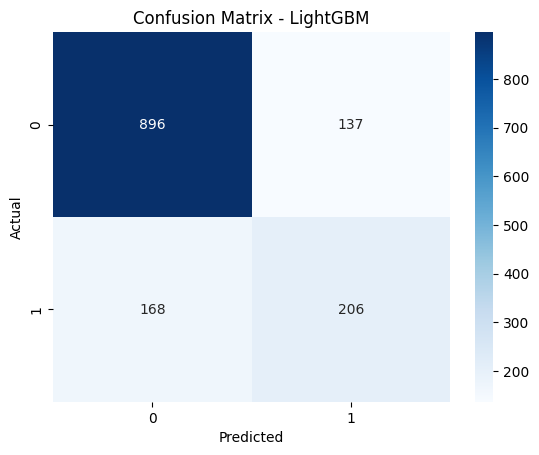

In [41]:
#Evaluate model performance
# Accuracy
acc = accuracy_score(y_test, y_pred_labels)
print(f"✅ Accuracy: {acc:.4f}")

# Detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_labels))

# Confusion matrix
cm = confusion_matrix(y_test,y_pred_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - LightGBM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


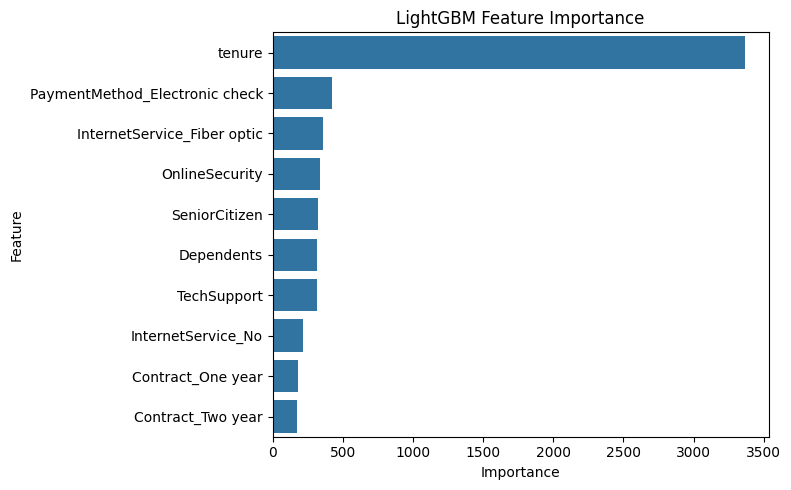

In [42]:
#Feature importance visualization
# Plot feature importances
feature_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': lgbm_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_imp)
plt.title('LightGBM Feature Importance')
plt.tight_layout()
plt.show()

#The most influential factors driving churn are those with the highest feature importance. 
# Understanding and improving these factors can directly enhance churn reduction strategies.

## Stakeholder Insights 
1. The model demonstrates strong overall performance but still fails to detect over 40% of customers likely to churn.
2. Improving churn recall will directly reduce revenue loss and enhance the effectiveness of customer retention strategies.

AUC Score: 0.8224


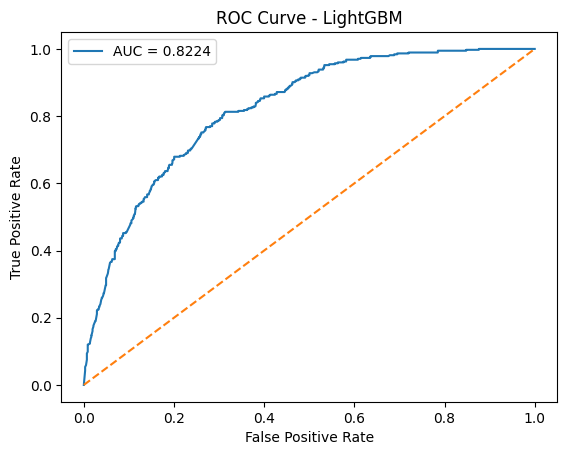

In [43]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = lgbm_model.predict_proba(X_test)[:, 1]

# calculate AUC 
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - LightGBM")
plt.legend()
plt.show()


## 9. Save the model

In [44]:
import pickle

with open("telco_churn_lgbm_model.pkl", "wb") as file:
    pickle.dump(lgbm_model, file)


In [45]:
import os
os.getcwd()  

'd:\\ayat\\DATA SCIENCE\\final project\\malestone 3'

In [46]:
with open("telco_churn_lgbm_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)


y_pred = loaded_model.predict(X_test)
print(y_pred[:10])


[0 1 0 0 0 0 0 0 0 0]
